<h2 id='part1'>StackOverflow Survey Data analysis</h2>


A comparison of some [data from StackOverflow surveys](https://insights.stackoverflow.com/survey/), for the years from 2013 to 2020.  

First, let's read in the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

Then, let's read in the data for the various years as DataFrames. **Note:** You will have to change the paths accorfingly to your case. 

You can see that the files have different name formats and that some require some adjustments in loading.

In [2]:
# Change data file path if needed
df_13 = pd.read_csv('./data/stack_overflow_2013/2013 Stack Overflow Survey Responses.csv',dtype='string') #Uncomment for 2013
df_14 = pd.read_csv('./data/stack_overflow_2014/2014 Stack Overflow Survey Responses.csv') #Uncomment for 2014
df_15 = pd.read_csv('./data/stack_overflow_2015/2015 Stack Overflow Developer Survey Responses.csv',dtype='string') #Uncomment for 2015
df_16 = pd.read_csv('./data/stack_overflow_2016/2016 Stack Overflow Survey Responses.csv') #Uncomment for 2016
df_17 = pd.read_csv('./data/stack_overflow_2017/survey_results_public.csv') #Uncomment for 2017
df_18 = pd.read_csv('./data/stack_overflow_2018/survey_results_public.csv',dtype='string') #Uncomment for 2018
df_19 = pd.read_csv('./data/stack_overflow_2019/survey_results_public.csv') #Uncomment for 2019
df_20 = pd.read_csv('./data/stack_overflow_2020/survey_results_public.csv') #Uncomment for 2020

Some further cleaning is needed for some of the years - you can look on the original .csv to check out.

In [3]:
# 2013, 2014 - get rid of first row
df_13.drop(0, inplace = True)
df_14.drop(0, inplace = True)

# 2015 - rename columns and get rid of first row
col_names_dict = {}

for col in df_15.columns:
    col_names_dict[col] = df_15[col][0]

df_15.rename(columns = col_names_dict, inplace = True)
df_15.drop(0, inplace = True)

You can use the next cell to take a look at the datasets, their columns etc.

In [4]:
# Look at any df you like
# df_13.head()
# df_20.tail()

# See details of the columns available
# for col in df_13.columns:
#     print(col)

**Step 1.** As a first step, let's take a look at the # of rows and columns for the various years

In [5]:
num_rows_13 = df_13.shape[0] # rows, 2013
num_cols_13 = df_13.shape[1] # columns, 2013

num_rows_14 = df_14.shape[0] # rows, 2014
num_cols_14 = df_14.shape[1] # columns, 2014

num_rows_15 = df_15.shape[0] # rows, 2015
num_cols_15 = df_15.shape[1] # columns, 2015

num_rows_16 = df_16.shape[0] # rows, 2016
num_cols_16 = df_16.shape[1] # columns, 2016

num_rows_17 = df_17.shape[0] # rows, 2017
num_cols_17 = df_17.shape[1] # columns, 2017

num_rows_18 = df_18.shape[0] # rows, 2018
num_cols_18 = df_18.shape[1] # columns, 2018

num_rows_19 = df_19.shape[0] # rows, 2019
num_cols_19 = df_19.shape[1] # columns, 2019

num_rows_20 = df_20.shape[0] # rows, 2020
num_cols_20 = df_20.shape[1] # columns, 2020

print("Year 2013 - Rows in the dataset: ", num_rows_13, "; Colums in the dataset: ", num_cols_13)
print("Year 2014 - Rows in the dataset: ", num_rows_14, "; Colums in the dataset: ", num_cols_14)
print("Year 2015 - Rows in the dataset: ", num_rows_15, "; Colums in the dataset: ", num_cols_15)
print("Year 2016 - Rows in the dataset: ", num_rows_16, "; Colums in the dataset: ", num_cols_16)
print("Year 2017 - Rows in the dataset: ", num_rows_17, "; Colums in the dataset: ", num_cols_17)
print("Year 2018 - Rows in the dataset: ", num_rows_18, "; Colums in the dataset: ", num_cols_18)
print("Year 2019 - Rows in the dataset: ", num_rows_19, "; Colums in the dataset: ", num_cols_19)
print("Year 2020 - Rows in the dataset: ", num_rows_20, "; Colums in the dataset: ", num_cols_20)

Year 2013 - Rows in the dataset:  9742 ; Colums in the dataset:  128
Year 2014 - Rows in the dataset:  7643 ; Colums in the dataset:  120
Year 2015 - Rows in the dataset:  26086 ; Colums in the dataset:  222
Year 2016 - Rows in the dataset:  56030 ; Colums in the dataset:  66
Year 2017 - Rows in the dataset:  51392 ; Colums in the dataset:  154
Year 2018 - Rows in the dataset:  98855 ; Colums in the dataset:  129
Year 2019 - Rows in the dataset:  88883 ; Colums in the dataset:  85
Year 2020 - Rows in the dataset:  64461 ; Colums in the dataset:  61


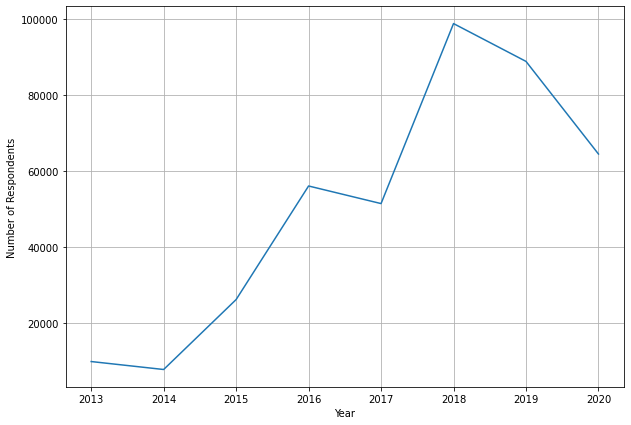

In [6]:
# Group size info together and plot
df_sample_size = pd.DataFrame({'Respondents': [num_rows_13, num_rows_14, num_rows_15, num_rows_16, num_rows_17, num_rows_18, num_rows_19, num_rows_20],
                             'Questions': [num_cols_13, num_cols_14, num_cols_15, num_cols_16, num_cols_17, num_cols_18, num_cols_19, num_cols_20]},
                              index=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

df_sample_size.Respondents.plot(grid=True, figsize = (10,7),
                  xlabel='Year', ylabel='Number of Respondents');

What is the percentage of `null` in the various years?

In [7]:
null_per_13 = df_13.isnull().sum().sum()/(num_rows_13*num_cols_13)
null_per_14 = df_14.isnull().sum().sum()/(num_rows_14*num_cols_14)
null_per_15 = df_15.isnull().sum().sum()/(num_rows_15*num_cols_15)
null_per_16 = df_16.isnull().sum().sum()/(num_rows_16*num_cols_16)
null_per_17 = df_17.isnull().sum().sum()/(num_rows_17*num_cols_17)
null_per_18 = df_18.isnull().sum().sum()/(num_rows_18*num_cols_18)
null_per_19 = df_19.isnull().sum().sum()/(num_rows_19*num_cols_19)
null_per_20 = df_20.isnull().sum().sum()/(num_rows_20*num_cols_20)

print ("Year 2013 - Percentage of Null: ", "{:.2f}".format(null_per_13*100), "%")
print ("Year 2014 - Percentage of Null: ", "{:.2f}".format(null_per_14*100), "%")
print ("Year 2015 - Percentage of Null: ", "{:.2f}".format(null_per_15*100), "%")
print ("Year 2016 - Percentage of Null: ", "{:.2f}".format(null_per_16*100), "%")
print ("Year 2017 - Percentage of Null: ", "{:.2f}".format(null_per_17*100), "%")
print ("Year 2018 - Percentage of Null: ", "{:.2f}".format(null_per_18*100), "%")
print ("Year 2019 - Percentage of Null: ", "{:.2f}".format(null_per_19*100), "%")
print ("Year 2020 - Percentage of Null: ", "{:.2f}".format(null_per_20*100), "%")

Year 2013 - Percentage of Null:  59.80 %
Year 2014 - Percentage of Null:  54.01 %
Year 2015 - Percentage of Null:  77.86 %
Year 2016 - Percentage of Null:  18.94 %
Year 2017 - Percentage of Null:  45.32 %
Year 2018 - Percentage of Null:  34.11 %
Year 2019 - Percentage of Null:  13.62 %
Year 2020 - Percentage of Null:  23.11 %


**Step 2.** Characterize professional categories (Professional Developer, Student etc.)

**Note:** For this and the next analyses we'll focus on the last few years, given that they seem to present the more detailed information, and more consistency in the format.

In [8]:
# NOTE: title of the column containing professional information changed from 2017 to 2020
status_vals_17 = df_17.Professional.value_counts() #2017
# Data in 2018 do not seem to include this information, even if it was asked to the respondent
status_vals_19 = df_19.MainBranch.value_counts() #2019
status_vals_20 = df_20.MainBranch.value_counts() #2020

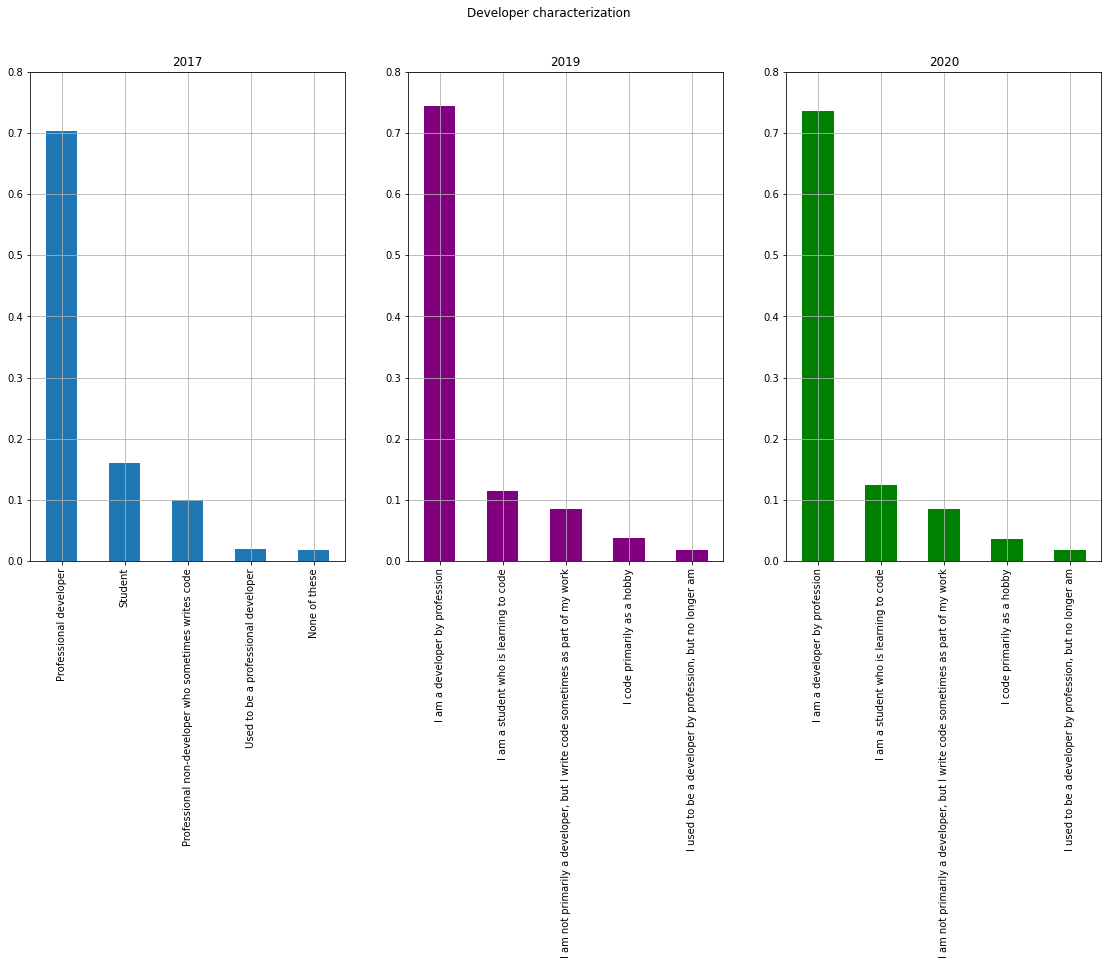

In [9]:
# Bar chart of the proportion of individuals in each professional category 
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3)
fig.suptitle("Developer characterization")
fig.set_figheight(9) 
fig.set_figwidth(19.2)

(status_vals_17/(num_rows_17 - df_17.Professional.isnull().sum())).plot(ax=ax1, kind="bar")
ax1.set_title("2017")
ax1.set_ylim([0, 0.8])
ax1.grid()

(status_vals_19/(num_rows_19 - df_19.MainBranch.isnull().sum())).plot(ax=ax2, kind="bar", color="purple")
ax2.set_title("2019")
ax2.set_ylim([0, 0.8])
ax2.grid()

(status_vals_20/(num_rows_20 - df_20.MainBranch.isnull().sum())).plot(ax=ax3, kind="bar", color="green")
ax3.set_title("2020")
ax3.set_ylim([0, 0.8])
ax3.grid();

**Step 3.** Characterize formal education of the Respondent. 

In [10]:
# NOTE: title of the column containing formal education information changed from 2017 to 2020
ed_vals_17 = df_17.FormalEducation.value_counts() #2017
ed_vals_18 = df_18.FormalEducation.value_counts() #2018
ed_vals_19 = df_19.EdLevel.value_counts() #2018
ed_vals_20 = df_20.EdLevel.value_counts() #2020

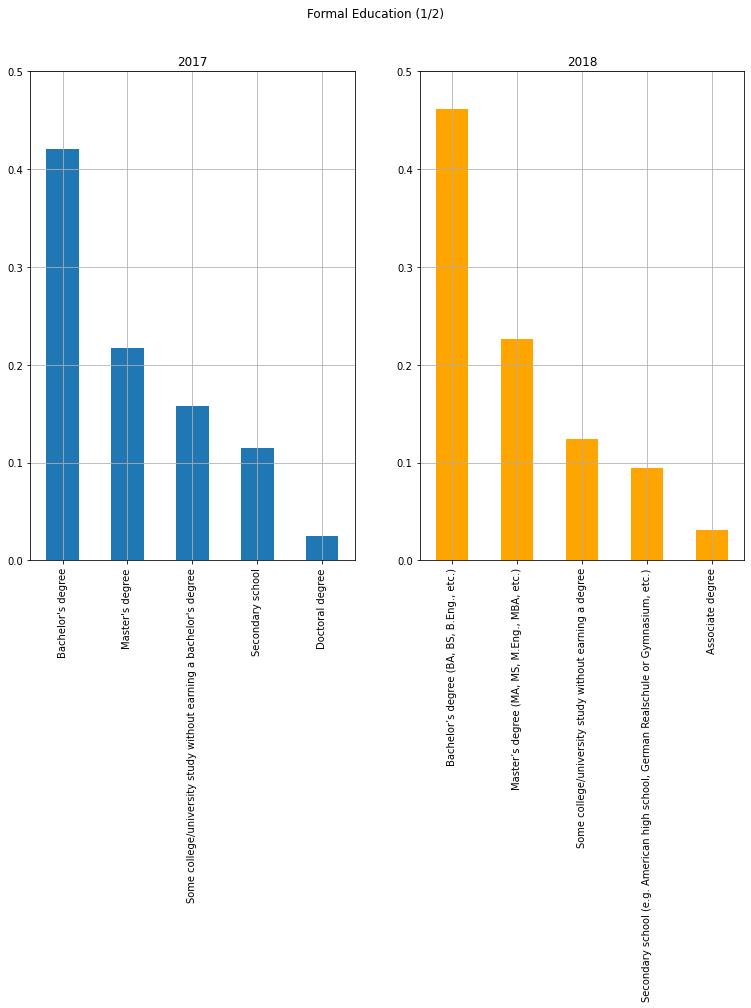

In [11]:
# Bar chart of the proportion of individuals in ed_vals
# Split in 2 figures for readibility of the labels
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Formal Education (1/2)")
fig.set_figheight(9) 
fig.set_figwidth(12.8)

(ed_vals_17[:5]/(num_rows_17 - df_17.FormalEducation.isnull().sum())).plot(ax=ax1, kind="bar");
ax1.set_title("2017")
ax1.set_ylim([0, 0.5])
ax1.grid()

(ed_vals_18[:5]/(num_rows_18 - df_18.FormalEducation.isnull().sum())).plot(ax=ax2, kind="bar", color = "orange");
ax2.set_title("2018")
ax2.set_ylim([0, 0.5])
ax2.grid();

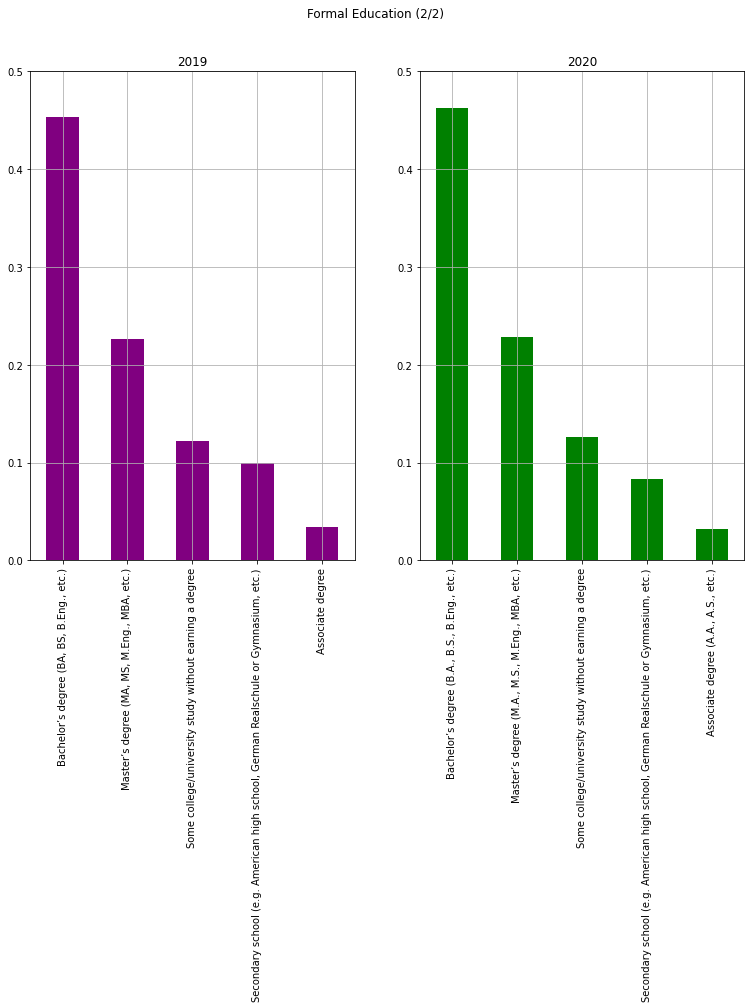

In [12]:
# Split in 2 figures for readibility of the labels
fig, (ax3, ax4) = plt.subplots(1, 2)
fig.suptitle("Formal Education (2/2)")
fig.set_figheight(9) 
fig.set_figwidth(12.8)

(ed_vals_19[:5]/(num_rows_19 - df_19.EdLevel.isnull().sum())).plot(ax=ax3, kind="bar", color = "purple");
ax3.set_title("2019")
ax3.set_ylim([0, 0.5])
ax3.grid();

(ed_vals_20[:5]/(num_rows_20 - df_20.EdLevel.isnull().sum())).plot(ax=ax4, kind="bar", color = "green");
ax4.set_title("2020")
ax4.set_ylim([0, 0.5])
ax4.grid();

**Step 4.** Let's take a look at technologies (languages used etc.) 

In [13]:
# Function to be used to parse the content on the various columns
def total_count(df, col1, col2, separator):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    separator - separator between strings (comma, semicolon etc.)

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    items_list - a list of the different items that were identified parsing the dataframe
    '''
    new_df = defaultdict(int)
    items_list = [] 

    # loop through rows
    for idx in range(df.shape[0]):
        # Split the string to separate the various languages used by the responder (if > 1)
        langs = df[col1][idx].split(separator)
        # Loop in the list of items
        for idy in range(len(langs)):
            # Update counts in the dataframe
            val = langs[idy]
            new_df[val] += int(df[col2][idx])
            # If not detected before update list            
            if (not(val in items_list)):
                items_list.append(val)
                
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df, items_list

What are the most used languages?

In [14]:
lang_used_16 = df_16.tech_do.value_counts() #2016
lang_used_17 = df_17.HaveWorkedLanguage.value_counts() #2017
lang_used_18 = df_18.LanguageWorkedWith.value_counts() #2018
lang_used_19 = df_19.LanguageWorkedWith.value_counts() #2019
lang_used_20 = df_20.LanguageWorkedWith.value_counts() #2020

In [15]:
lu_16 = lang_used_16.reset_index()
lu_17 = lang_used_17.reset_index()
lu_18 = lang_used_18.reset_index()
lu_19 = lang_used_19.reset_index()
lu_20 = lang_used_20.reset_index()

In [16]:
lu_16.rename(columns={'index': 'language', 'tech_do': 'count'}, inplace=True)
lu_17.rename(columns={'index': 'language', 'HaveWorkedLanguage': 'count'}, inplace=True)
lu_18.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
lu_19.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
lu_20.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)

In [17]:
lu_16_df, worked_languages_16 = total_count(lu_16, 'language', 'count', '; ') # NOTE: separator for 2016 is different
lu_17_df, worked_languages_17 = total_count(lu_17, 'language', 'count', '; ') # NOTE: separator for 2017 is different
lu_18_df, worked_languages_18 = total_count(lu_18, 'language', 'count', ';')
lu_19_df, worked_languages_19 = total_count(lu_19, 'language', 'count', ';')
lu_20_df, worked_languages_20 = total_count(lu_20, 'language', 'count', ';')

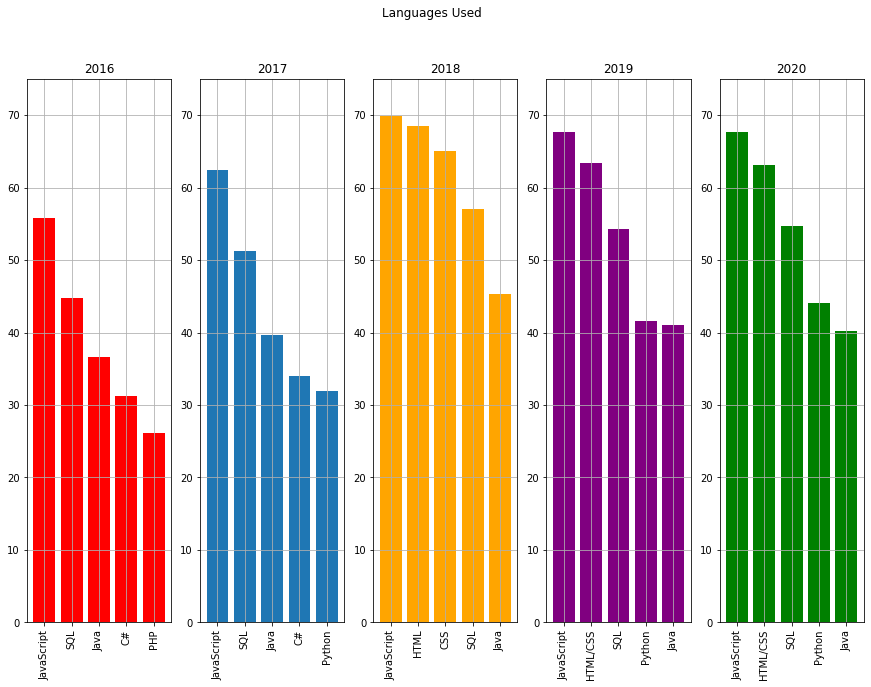

In [18]:
# Bar chart of the proportion of the top 5 languages/combinations for the individuals in count_vals
fig, axes = plt.subplots(1, 5)
fig.suptitle("Languages Used")
fig.set_figheight(10) 
fig.set_figwidth(15)

axes[0].bar(lu_16_df[:5]['language'].to_list(), (lu_16_df[:5]['count'].to_list()
        /(num_rows_16 - df_16.tech_do.isnull().sum()))*100, color = "red")
axes[0].tick_params('x', labelrotation=90)
axes[0].set_title("2016")
axes[0].set_ylim([0, 75])
axes[0].grid()

axes[1].bar(lu_17_df[:5]['language'].to_list(), (lu_17_df[:5]['count'].to_list()
        /(num_rows_17 - df_17.HaveWorkedLanguage.isnull().sum()))*100)
axes[1].tick_params('x', labelrotation=90)
axes[1].set_title("2017")
axes[1].set_ylim([0, 75])
axes[1].grid()

axes[2].bar(lu_18_df[:5]['language'].to_list(), (lu_18_df[:5]['count'].to_list()
        /(num_rows_18 - df_18.LanguageWorkedWith.isnull().sum()))*100, color = "orange")
axes[2].tick_params('x', labelrotation=90)
axes[2].set_title("2018")
axes[2].set_ylim([0, 75])
axes[2].grid()

axes[3].bar(lu_19_df[:5]['language'].to_list(), (lu_19_df[:5]['count'].to_list()
        /(num_rows_19 - df_19.LanguageWorkedWith.isnull().sum()))*100, color = "purple")
axes[3].tick_params('x', labelrotation=90)
axes[3].set_title("2019")
axes[3].set_ylim([0, 75])
axes[3].grid()

axes[4].bar(lu_20_df[:5]['language'].to_list(), (lu_20_df[:5]['count'].to_list()
        /(num_rows_20 - df_20.LanguageWorkedWith.isnull().sum()))*100, color = "green")
axes[4].tick_params('x', labelrotation=90)
axes[4].set_title("2020")
axes[4].set_ylim([0, 75])
axes[4].grid();

What are the languages people want to use?

In [19]:
lang_wanted_16 = df_16.tech_want.value_counts() #2016
lang_wanted_17 = df_17.WantWorkLanguage.value_counts() #2017
lang_wanted_18 = df_18.LanguageDesireNextYear.value_counts() #2018
lang_wanted_19 = df_19.LanguageDesireNextYear.value_counts() #2019
lang_wanted_20 = df_20.LanguageDesireNextYear.value_counts() #2020

In [20]:
lw_16 = lang_wanted_16.reset_index()
lw_17 = lang_wanted_17.reset_index()
lw_18 = lang_wanted_18.reset_index()
lw_19 = lang_wanted_19.reset_index()
lw_20 = lang_wanted_20.reset_index()

In [21]:
lw_16.rename(columns={'index': 'language', 'tech_want': 'count'}, inplace=True)
lw_17.rename(columns={'index': 'language', 'WantWorkLanguage': 'count'}, inplace=True)
lw_18.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
lw_19.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
lw_20.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)

In [22]:
lw_16_df, wanted_languages_16 = total_count(lw_16, 'language', 'count', '; ') # NOTE: separator for 2016 is different
lw_17_df, wanted_languages_17 = total_count(lw_17, 'language', 'count', '; ') # NOTE: separator for 2017 is different
lw_18_df, wanted_languages_18 = total_count(lw_18, 'language', 'count', ';')
lw_19_df, wanted_languages_19 = total_count(lw_19, 'language', 'count', ';')
lw_20_df, wanted_languages_20 = total_count(lw_20, 'language', 'count', ';')

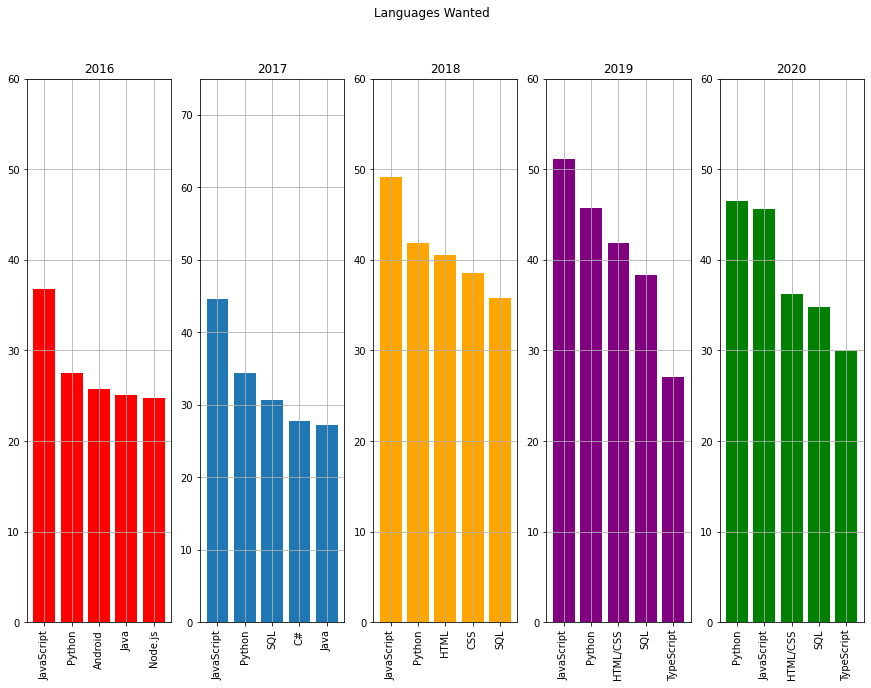

In [23]:
# Bar chart of the proportion of the top 5 languages/combinations for the individuals in count_vals
fig, axes = plt.subplots(1, 5)
fig.suptitle("Languages Wanted")
fig.set_figheight(10) 
fig.set_figwidth(15)

axes[0].bar(lw_16_df[:5]['language'].to_list(), (lw_16_df[:5]['count'].to_list()
        /(num_rows_16 - df_16.tech_do.isnull().sum()))*100, color = "red")
axes[0].tick_params('x', labelrotation=90)
axes[0].set_title("2016")
axes[0].set_ylim([0, 60])
axes[0].grid()

axes[1].bar(lw_17_df[:5]['language'].to_list(), (lw_17_df[:5]['count'].to_list()
        /(num_rows_17 - df_17.HaveWorkedLanguage.isnull().sum()))*100)
axes[1].tick_params('x', labelrotation=90)
axes[1].set_title("2017")
axes[1].set_ylim([0, 75])
axes[1].grid()

axes[2].bar(lw_18_df[:5]['language'].to_list(), (lw_18_df[:5]['count'].to_list()
        /(num_rows_18 - df_18.LanguageWorkedWith.isnull().sum()))*100, color = "orange")
axes[2].tick_params('x', labelrotation=90)
axes[2].set_title("2018")
axes[2].set_ylim([0, 60])
axes[2].grid()

axes[3].bar(lw_19_df[:5]['language'].to_list(), (lw_19_df[:5]['count'].to_list()
        /(num_rows_19 - df_19.LanguageWorkedWith.isnull().sum()))*100, color = "purple")
axes[3].tick_params('x', labelrotation=90)
axes[3].set_title("2019")
axes[3].set_ylim([0, 60])
axes[3].grid()

axes[4].bar(lw_20_df[:5]['language'].to_list(), (lw_20_df[:5]['count'].to_list()
        /(num_rows_20 - df_20.LanguageWorkedWith.isnull().sum()))*100, color = "green")
axes[4].tick_params('x', labelrotation=90)
axes[4].set_title("2020")
axes[4].set_ylim([0, 60])
axes[4].grid();

**Step 5.** Group respondent according to non-professional characteristics

For this parte of the analysis we will consider also the datasets for previous years.

Let's start with Country

In [24]:
# The title of the column changes over the years
count_vals_13 = df_13['What Country or Region do you live in?'].value_counts() #2013
count_vals_14 = df_14['What Country do you live in?'].value_counts() #2014
count_vals_15 = df_15.Country.value_counts() #2015
count_vals_16 = df_16.country.value_counts() #2016
count_vals_17 = df_17.Country.value_counts() #2017
count_vals_18 = df_18.Country.value_counts() #2018
count_vals_19 = df_19.Country.value_counts() #2019
count_vals_20 = df_20.Country.value_counts() #2020

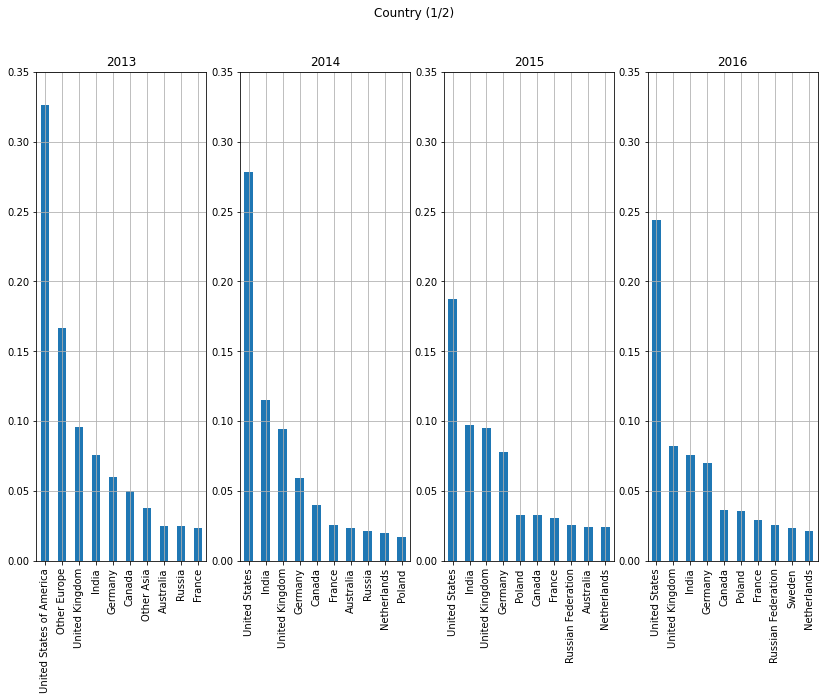

In [25]:
# Bar chart of the first 10 countries in count_vals
# Split in two to improve readability of labels
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Country (1/2)")
fig.set_figheight(9) 
fig.set_figwidth(14)

(count_vals_13[:10]/(num_rows_13 - df_13['What Country or Region do you live in?'].isnull().sum())).plot(ax=ax1, kind="bar")
ax1.set_title("2013")
ax1.set_ylim([0, 0.35])
ax1.grid()

(count_vals_14[:10]/(num_rows_14 - df_14['What Country do you live in?'].isnull().sum())).plot(ax=ax2, kind="bar")
ax2.set_title("2014")
ax2.set_ylim([0, 0.35])
ax2.grid()

(count_vals_15[:10]/(num_rows_15 - df_15.Country.isnull().sum())).plot(ax=ax3, kind="bar")
ax3.set_title("2015")
ax3.set_ylim([0, 0.35])
ax3.grid()

(count_vals_16[:10]/(num_rows_16 - df_16.country.isnull().sum())).plot(ax=ax4, kind="bar");
ax4.set_title("2016")
ax4.set_ylim([0, 0.35])
ax4.grid();

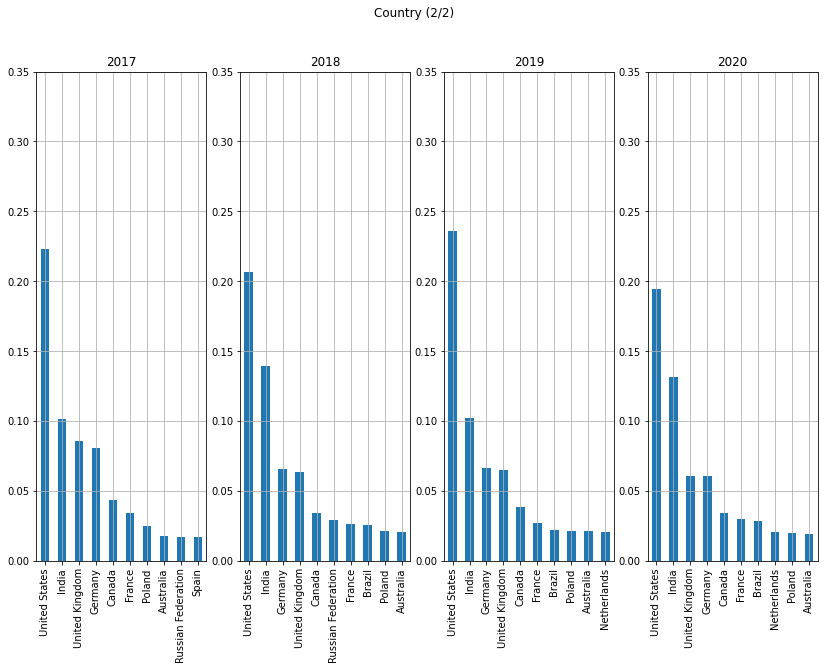

In [26]:
# Split in two to inprove readibility of lables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Country (2/2)")
fig.set_figheight(9) 
fig.set_figwidth(14)

(count_vals_17[:10]/(num_rows_17 - df_17.Country.isnull().sum())).plot(ax=ax1, kind="bar")
ax1.set_title("2017")
ax1.set_ylim([0, 0.35])
ax1.grid()

(count_vals_18[:10]/(num_rows_18 - df_18.Country.isnull().sum())).plot(ax=ax2, kind="bar")
ax2.set_title("2018")
ax2.set_ylim([0, 0.35])
ax2.grid()

(count_vals_19[:10]/(num_rows_19 - df_19.Country.isnull().sum())).plot(ax=ax3, kind="bar");
ax3.set_title("2019")
ax3.set_ylim([0, 0.35])
ax3.grid();

(count_vals_20[:10]/(num_rows_20 - df_20.Country.isnull().sum())).plot(ax=ax4, kind="bar");
ax4.set_title("2020")
ax4.set_ylim([0, 0.35])
ax4.grid();

Now let's take a look at information about gender

In [27]:
# 2013 does not include information about gender in results
gend_vals_14 = df_14['What is your gender?'].value_counts() #2014
gend_vals_15 = df_15.Gender.value_counts() #2015
gend_vals_16 = df_16.gender.value_counts() #2016
gend_vals_17 = df_17.Gender.value_counts() #2017
gend_vals_18 = df_18.Gender.value_counts() #2018
gend_vals_19 = df_19.Gender.value_counts() #2019
gend_vals_20 = df_20.Gender.value_counts() #2020

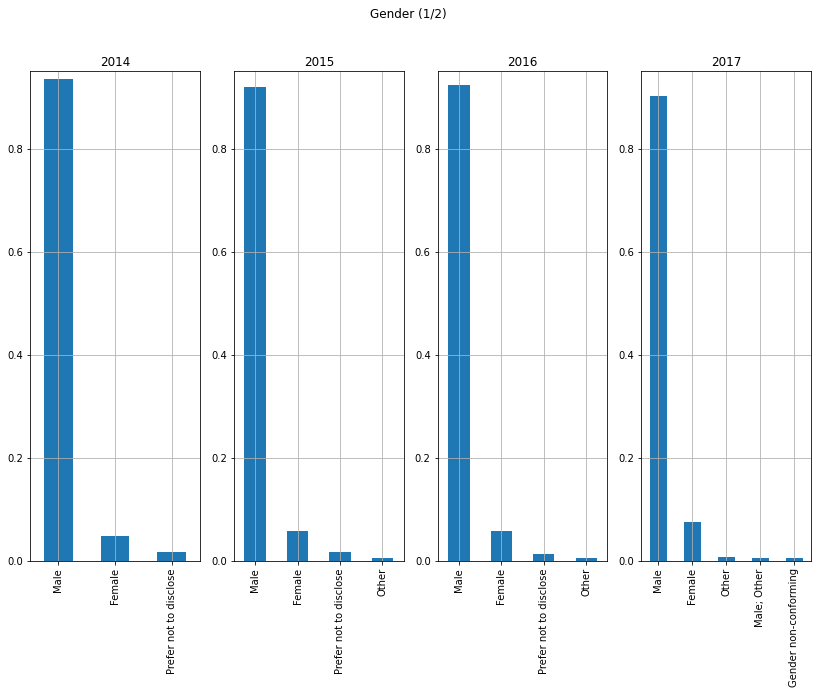

In [28]:
# Bar chart of the proportion of the top 5 values for the individuals in gend_vals
# Splitting to improve readability
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Gender (1/2)")
fig.set_figheight(9) 
fig.set_figwidth(14)

(gend_vals_14[:5]/(num_rows_14 - df_14['What is your gender?'].isnull().sum())).plot(ax=ax1, kind="bar")
ax1.set_title("2014")
ax1.set_ylim([0, 0.95])
ax1.grid()

(gend_vals_15[:5]/(num_rows_15 - df_15.Gender.isnull().sum())).plot(ax=ax2, kind="bar")
ax2.set_title("2015")
ax2.set_ylim([0, 0.95])
ax2.grid()

(gend_vals_16[:5]/(num_rows_16 - df_16.gender.isnull().sum())).plot(ax=ax3, kind="bar")
ax3.set_title("2016")
ax3.set_ylim([0, 0.95])
ax3.grid()

(gend_vals_17[:5]/(num_rows_17 - df_17.Gender.isnull().sum())).plot(ax=ax4, kind="bar")
ax4.set_title("2017")
ax4.set_ylim([0, 0.95])
ax4.grid()

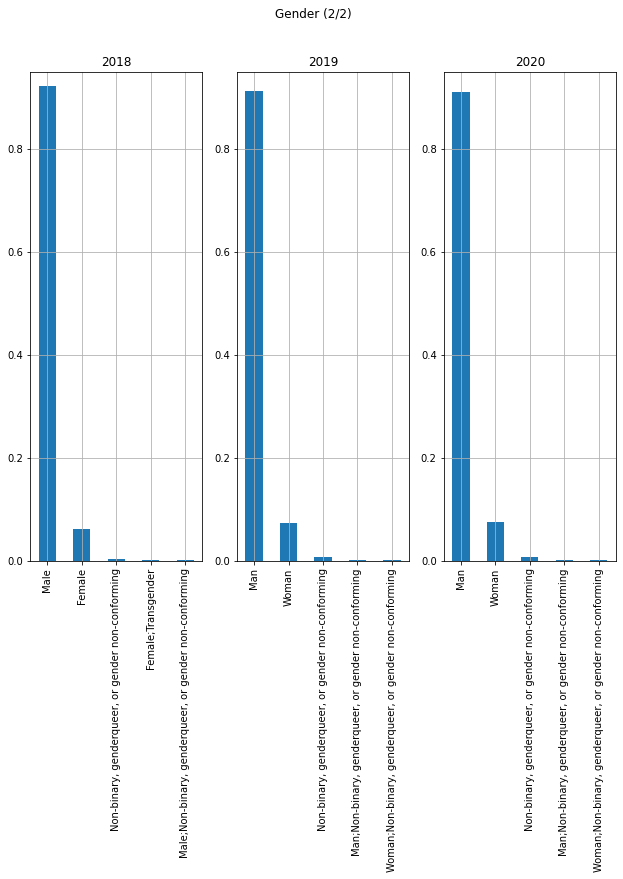

In [29]:
# Splitting to improve readability
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Gender (2/2)")
fig.set_figheight(9) 
fig.set_figwidth(10.5)

(gend_vals_18[:5]/(num_rows_18 - df_18.Gender.isnull().sum())).plot(ax=ax1, kind="bar");
ax1.set_title("2018")
ax1.set_ylim([0, 0.95])
ax1.grid();

(gend_vals_19[:5]/(num_rows_19 - df_19.Gender.isnull().sum())).plot(ax=ax2, kind="bar")
ax2.set_title("2019")
ax2.set_ylim([0, 0.95])
ax2.grid()

(gend_vals_20[:5]/(num_rows_20 - df_20.Gender.isnull().sum())).plot(ax=ax3, kind="bar");
ax3.set_title("2020")
ax3.set_ylim([0, 0.95])
ax3.grid();

Aggregate and show Male/Female percentages over the years

In [30]:
perc_male = []
perc_female = []

perc_male.append((gend_vals_14[0]/(num_rows_14 - df_14['What is your gender?'].isnull().sum()))*100)
perc_male.append((gend_vals_15[0]/(num_rows_15 - df_15.Gender.isnull().sum()))*100)
perc_male.append((gend_vals_16[0]/(num_rows_16 - df_16.gender.isnull().sum()))*100)
perc_male.append((gend_vals_17[0]/(num_rows_17 - df_17.Gender.isnull().sum()))*100)
perc_male.append((gend_vals_18[0]/(num_rows_18 - df_18.Gender.isnull().sum()))*100)
perc_male.append((gend_vals_19[0]/(num_rows_19 - df_19.Gender.isnull().sum()))*100)
perc_male.append((gend_vals_20[0]/(num_rows_20 - df_20.Gender.isnull().sum()))*100)

perc_female.append((gend_vals_14[1]/(num_rows_14 - df_14['What is your gender?'].isnull().sum()))*100)
perc_female.append((gend_vals_15[1]/(num_rows_15 - df_15.Gender.isnull().sum()))*100)
perc_female.append((gend_vals_16[1]/(num_rows_16 - df_16.gender.isnull().sum()))*100)
perc_female.append((gend_vals_17[1]/(num_rows_17 - df_17.Gender.isnull().sum()))*100)
perc_female.append((gend_vals_18[1]/(num_rows_18 - df_18.Gender.isnull().sum()))*100)
perc_female.append((gend_vals_19[1]/(num_rows_19 - df_19.Gender.isnull().sum()))*100)
perc_female.append((gend_vals_20[1]/(num_rows_20 - df_20.Gender.isnull().sum()))*100)

In [31]:
df_gend_perc = pd.DataFrame({'Male': perc_male,
                             'Female': perc_female},
                              index=[2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [32]:
df_gend_perc.head(7)

,Male,Female
2014,93.438606,4.791723
2015,92.056401,5.748912
2016,92.447739,5.760443
2017,90.133250,7.418609
2018,92.227272,6.243311
2019,91.233637,7.428050
2020,91.012125,7.603299


In [33]:
# First order polynomial to fit data
coefficients_male, residuals_male, _,_,_ = np.polyfit(df_gend_perc.index.array,df_gend_perc.Male,1, full=True)
coefficients_female, residuals_female, _,_,_ = np.polyfit(df_gend_perc.index.array,df_gend_perc.Female,1, full=True)

# Accuracy of the linear predictors
# mse = mean square error
# nrmse = normalised root mean square error
mse_male = residuals_male[0]/(len(df_gend_perc.index))
nrmse_male = np.sqrt(mse_male)/(df_gend_perc.Male.max() - df_gend_perc.Male.min())
mse_female = residuals_female[0]/(len(df_gend_perc.index))
nrmse_female = np.sqrt(mse_female)/(df_gend_perc.Female.max() - df_gend_perc.Female.min())

print('Slope - Male: ' + str(coefficients_male[0]) + '; Female: ' + str(coefficients_female[0]))
print('NRMSE - Male: ' + str(nrmse_male)+ '; Female: ' + str(nrmse_female))


Slope - Male: -0.32662282091561523; Female: 0.43842390740045456
NRMSE - Male: 0.23111499776360084; Female: 0.16999092555397122


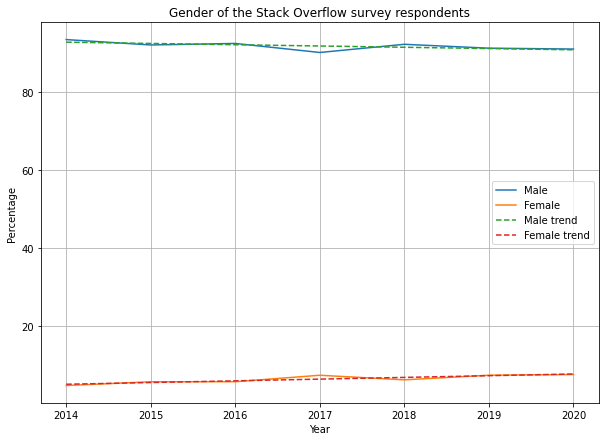

In [34]:
# Plot, including trendlines
ax = df_gend_perc.plot(grid=True, figsize = (10,7),
                  xlabel='Year', ylabel='Percentage',
                  title='Gender of the Stack Overflow survey respondents');

# Extrapolate linear models
xx = [x for x in (df_gend_perc.index.array)]

yy_m = [coefficients_male[0]*x + coefficients_male[1] for x in (df_gend_perc.index.array)]
yy_f = [coefficients_female[0]*x + coefficients_female[1] for x in (df_gend_perc.index.array)]


ax.plot(xx,yy_m,'--')
ax.plot(xx,yy_f,'--')
ax.legend(['Male', 'Female', 'Male trend', 'Female trend']);

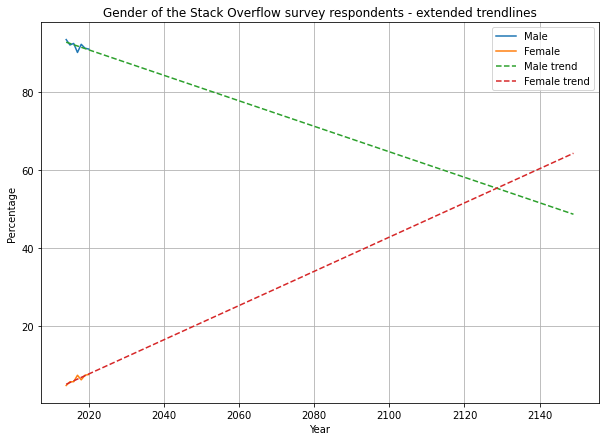

In [35]:
# Plot, with extended trendlines
ax = df_gend_perc.plot(grid=True, figsize = (10,7),
                  xlabel='Year', ylabel='Percentage',
                  title='Gender of the Stack Overflow survey respondents - extended trendlines');

# Extend predictions a year for an even distribution
x_ext = int((50 - coefficients_male[1])/coefficients_male[0])+5

xx.append(x_ext)
yy_m.append(coefficients_male[0]*x_ext + coefficients_male[1])
yy_f.append(coefficients_female[0]*x_ext + coefficients_female[1])


ax.plot(xx,yy_m,'--')
ax.plot(xx,yy_f,'--')
ax.grid(b=True)
ax.legend(['Male', 'Female', 'Male trend', 'Female trend']);


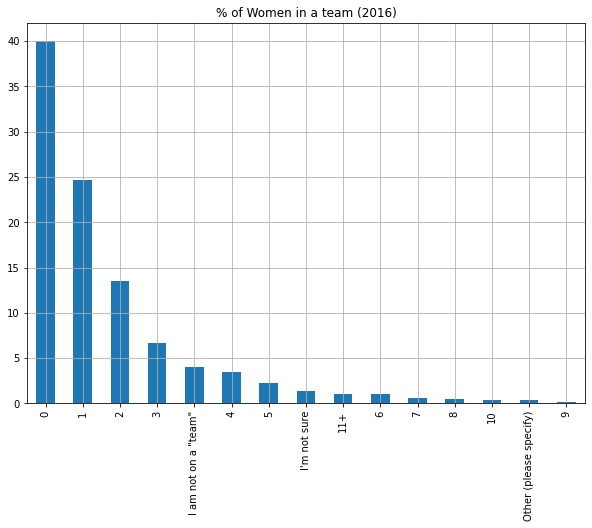

In [36]:
# Finally, note that 2016 included a specific "women_on_teams" columns
wot_16 = df_16.women_on_team.value_counts()

(wot_16*100/(num_rows_16 - df_16.women_on_team.isnull().sum())).plot(kind="bar", grid=True, figsize = (10,7),
                                                                 title='% of Women in a team (2016)');

Finally, let's take a look at ethnicity

In [37]:
# 2013/17 does not include information about ethnicity in results
ethn_vals_17 = df_17.Race.value_counts() #2017
ethn_vals_18 = df_18.RaceEthnicity.value_counts() #2018
ethn_vals_19 = df_19.Ethnicity.value_counts() #2019
ethn_vals_20 = df_20.Ethnicity.value_counts() #2020

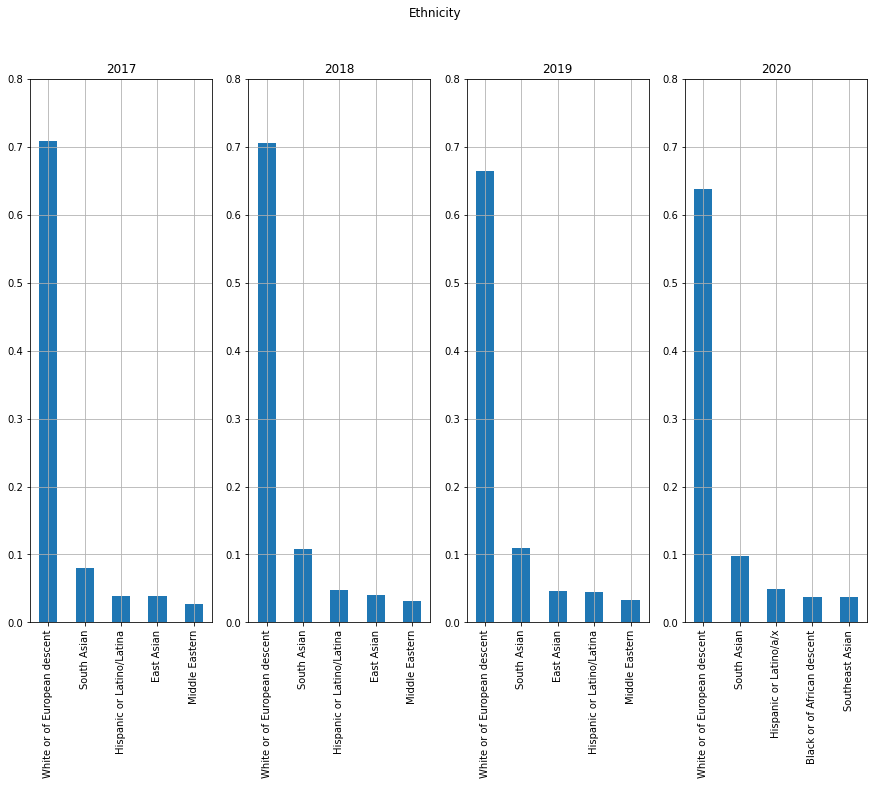

In [38]:
# Bar chart of the proportion of the top 5 values for the individuals in ethn_vals
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle("Ethnicity")
fig.set_figheight(10) 
fig.set_figwidth(15)

(ethn_vals_17[:5]/(num_rows_17 - df_17.Race.isnull().sum())).plot(ax=ax1, kind="bar")
ax1.set_title("2017")
ax1.set_ylim([0, 0.80])
ax1.grid()

(ethn_vals_18[:5]/(num_rows_18 - df_18.RaceEthnicity.isnull().sum())).plot(ax=ax2, kind="bar")
ax2.set_title("2018")
ax2.set_ylim([0, 0.80])
ax2.grid()

(ethn_vals_19[:5]/(num_rows_19 - df_19.Ethnicity.isnull().sum())).plot(ax=ax3, kind="bar")
ax3.set_title("2019")
ax3.set_ylim([0, 0.80])
ax3.grid()

(ethn_vals_20[:5]/(num_rows_20 - df_20.Ethnicity.isnull().sum())).plot(ax=ax4, kind="bar")
ax4.set_title("2020")
ax4.set_ylim([0, 0.80])
ax4.grid()